In [1]:
#Import Modules 
import os 
import csv 
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as sts
import numpy as np
import gmaps
import requests
from citipy import citipy
import json

In [2]:
#Open Wine File 
csv_path = 'Resources/winemag-data.csv'

In [3]:
#Read wine data 
wine_data_pd = pd.read_csv(csv_path)

#Cleaning Data 
clean_data_pd = wine_data_pd.drop(['taster_name', 'taster_twitter_handle'], axis=1)
clean_data_pd = clean_data_pd.dropna(subset=['price', 'region_1','designation','points','price','title','description','variety'])
clean_data_pd

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,title,variety,winery
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
5,5,Spain,Blackberry and raspberry aromas show a typical...,Ars In Vitro,87,15.0,Northern Spain,Navarra,NaN,Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...,Tempranillo-Merlot,Tandem
6,6,Italy,"Here's a bright, informal red that opens with ...",Belsito,87,16.0,Sicily & Sardinia,Vittoria,NaN,Terre di Giurfo 2013 Belsito Frappato (Vittoria),Frappato,Terre di Giurfo
9,9,France,This has great depth of flavor with its fresh ...,Les Natures,87,27.0,Alsace,Alsace,NaN,Jean-Baptiste Adam 2012 Les Natures Pinot Gris...,Pinot Gris,Jean-Baptiste Adam
...,...,...,...,...,...,...,...,...,...,...,...,...
129959,129959,France,The granite soil of the Brand Grand Cru vineya...,Brand Grand Cru,90,57.0,Alsace,Alsace,NaN,Cave de Turckheim 2010 Brand Grand Cru Pinot G...,Pinot Gris,Cave de Turckheim
129962,129962,Italy,"Blackberry, cassis, grilled herb and toasted a...",Sàgana Tenuta San Giacomo,90,40.0,Sicily & Sardinia,Sicilia,NaN,Cusumano 2012 Sàgana Tenuta San Giacomo Nero d...,Nero d'Avola,Cusumano
129965,129965,France,"While it's rich, this beautiful dry wine also ...",Seppi Landmann Vallée Noble,90,28.0,Alsace,Alsace,NaN,Domaine Rieflé-Landmann 2013 Seppi Landmann Va...,Pinot Gris,Domaine Rieflé-Landmann
129968,129968,France,Well-drained gravel soil gives this wine its c...,Kritt,90,30.0,Alsace,Alsace,NaN,Domaine Gresser 2013 Kritt Gewurztraminer (Als...,Gewürztraminer,Domaine Gresser


In [4]:
us_data = clean_data_pd.dropna()
us_data = us_data[us_data['country']=='US']
us_data

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,title,variety,winery
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
10,10,US,"Soft, supple plum envelopes an oaky structure ...",Mountain Cuvée,87,19.0,California,Napa Valley,Napa,Kirkland Signature 2011 Mountain Cuvée Caberne...,Cabernet Sauvignon,Kirkland Signature
23,23,US,This wine from the Geneseo district offers aro...,Signature Selection,87,22.0,California,Paso Robles,Central Coast,Bianchi 2011 Signature Selection Merlot (Paso ...,Merlot,Bianchi
25,25,US,Oak and earth intermingle around robust aromas...,King Ridge Vineyard,87,69.0,California,Sonoma Coast,Sonoma,Castello di Amorosa 2011 King Ridge Vineyard P...,Pinot Noir,Castello di Amorosa
33,33,US,"Rustic and dry, this has flavors of berries, c...",Puma Springs Vineyard,86,50.0,California,Dry Creek Valley,Sonoma,Envolve 2010 Puma Springs Vineyard Red (Dry Cr...,Red Blend,Envolve
...,...,...,...,...,...,...,...,...,...,...,...,...
129920,129920,US,"Shows the clean, citrus acid juiciness and sil...",Fiddlestix Vineyard,91,48.0,California,Sta. Rita Hills,Central Coast,Pali 2006 Fiddlestix Vineyard Pinot Noir (Sta....,Pinot Noir,Pali
129926,129926,US,This pure Syrah from Reininger's estate vineya...,Ash Hollow Vineyard,91,41.0,Washington,Walla Walla Valley (WA),Columbia Valley,Reininger 2005 Ash Hollow Vineyard Syrah (Wall...,Syrah,Reininger
129945,129945,US,Hailing from one of the more popular vineyards...,Jurassic Park Vineyard Old Vines,90,20.0,California,Santa Ynez Valley,Central Coast,Birichino 2013 Jurassic Park Vineyard Old Vine...,Chenin Blanc,Birichino
129949,129949,US,There's no bones about the use of oak in this ...,Barrel Fermented,90,35.0,California,Napa Valley,Napa,Flora Springs 2013 Barrel Fermented Chardonnay...,Chardonnay,Flora Springs


In [7]:
#Finding the average score for each winery 
grouped_wine = us_data.groupby('winery')

#Finding the the province of each winery
province_wine = pd.DataFrame(grouped_wine['region_2'].unique())

country_wine = pd.DataFrame(grouped_wine['country'].unique())

wine_pd = pd.merge(province_wine, country_wine, on = 'winery')

#Merging the tables together 
wine_pd = pd.merge(wine_pd, mean_wine, on = 'winery')

#Resetting the Index
wine_pd = wine_pd.reset_index()

#Setting Province as a string 
wine_pd['region_2'] = wine_pd['region_2'].str[0]

wine_pd['country'] = wine_pd['country'].str[0]

In [8]:
#Displaying the Data Frame 
wine_pd

,winery,region_2,country,price
0,10 Knots,Central Coast,US,28.000000
1,100 Percent Wine,California Other,US,18.000000
2,1000 Stories,California Other,US,19.000000
3,12C Wines,Napa,US,92.600000
4,14 Hands,Columbia Valley,US,20.897436
...,...,...,...,...
3699,un4seen,California Other,US,10.000000
3700,Écluse,Central Coast,US,41.235294
3701,Élevée Winegrowers,Willamette Valley,US,45.000000
3702,Órale,Central Coast,US,30.000000


In [9]:
#Finding the wrost wineries among the pack 
worst_us_wineries = wine_pd.nsmallest(50, 'price', keep = 'last')

#Displaying the 50 wrost wineries 
worst_us_wineries.count()

winery      50
region_2    50
country     50
price       50
dtype: int64

In [10]:
#Finding the best wineries among the pack 
best_us_wineries = wine_pd.nlargest(50, 'price', keep = 'last')

#Displaying the 10 wrost wineries 
best_us_wineries

,winery,region_2,country,price
3655,Yao Ming,Napa,US,625.000000
3440,Verité,Sonoma,US,373.333333
1737,Kapcsandy Family Winery,Napa,US,325.000000
1577,Hundred Acre,Napa,US,300.000000
164,Araujo,Napa,US,275.000000
385,Blair,Central Coast,US,261.444444
777,Colgin,Napa,US,243.333333
1518,Hewitt,Napa,US,237.500000
236,BOND,Napa,US,230.000000
1495,Heitz,Napa,US,225.000000


In [11]:
region_2 = best_us_wineries['region_2']
country = best_us_wineries['country']

location = zip(region_2, country)

lat = []
lng = []
fips = []
city_list = []

api_key = 'd44516f8f6db4dab8c39e341cbdd2719' 

In [12]:
for location in location: 
    url = (f'https://api.opencagedata.com/geocode/v1/json?q={location[0]}%2C%20{location[1]}&key={api_key}')
    response = requests.get(url)
    cordinate_data = response.json()
    lat.append(cordinate_data['results'][0]['geometry']['lat'])
    lng.append(cordinate_data['results'][0]['geometry']['lng'])

In [17]:
best_us_wineries['Latitude']=lat
best_us_wineries['Longitude']=lng

cordinates = zip(lat,lng)

best_us_wineries

,winery,region_2,country,price,Latitude,Longitude
3655,Yao Ming,Napa,US,625.000000,38.297137,-122.285529
3440,Verité,Sonoma,US,373.333333,38.511080,-122.847339
1737,Kapcsandy Family Winery,Napa,US,325.000000,38.297137,-122.285529
1577,Hundred Acre,Napa,US,300.000000,38.297137,-122.285529
164,Araujo,Napa,US,275.000000,38.297137,-122.285529
385,Blair,Central Coast,US,261.444444,-33.311710,151.312068
777,Colgin,Napa,US,243.333333,38.297137,-122.285529
1518,Hewitt,Napa,US,237.500000,38.297137,-122.285529
236,BOND,Napa,US,230.000000,38.297137,-122.285529
1495,Heitz,Napa,US,225.000000,38.297137,-122.285529


In [14]:
city_list = []

for cordinates in cordinates: 
    city = citipy.nearest_city(cordinates[0], cordinates[1]).city_name
    city_list.append(city)

#Finding the length of the list of cities 
len(city_list)

50

In [18]:
best_us_wineries['City'] = city_list

In [19]:
temp = []
hum = []

weather_api_key = 'e7909cb56283b125242b31247d3922d8'

url =  'http://api.openweathermap.org/data/2.5/weather?'

city = best_us_wineries['City']

for city in city:
    query_url = url + 'appid=' + weather_api_key + '&q=' + city + '&units=imperial'
    weather_response = requests.get(query_url)
    weather_data = weather_response.json()
    
    temp.append(weather_data['main']['temp'])

In [20]:
best_us_wineries['Temperature'] = temp
best_us_wineries

,winery,region_2,country,price,Latitude,Longitude,City,Temperature
3655,Yao Ming,Napa,US,625.000000,38.297137,-122.285529,napa,85.66
3440,Verité,Sonoma,US,373.333333,38.511080,-122.847339,windsor,50.56
1737,Kapcsandy Family Winery,Napa,US,325.000000,38.297137,-122.285529,napa,85.66
1577,Hundred Acre,Napa,US,300.000000,38.297137,-122.285529,napa,85.66
164,Araujo,Napa,US,275.000000,38.297137,-122.285529,napa,85.66
385,Blair,Central Coast,US,261.444444,-33.311710,151.312068,cessnock,86.61
777,Colgin,Napa,US,243.333333,38.297137,-122.285529,napa,85.66
1518,Hewitt,Napa,US,237.500000,38.297137,-122.285529,napa,85.66
236,BOND,Napa,US,230.000000,38.297137,-122.285529,napa,85.66
1495,Heitz,Napa,US,225.000000,38.297137,-122.285529,napa,85.66


In [21]:
best_temp = best_us_wineries['Temperature']

In [22]:
best_price = best_us_wineries['price']

In [23]:
region_2 = worst_us_wineries['region_2']
country = worst_us_wineries['country']

location = zip(region_2, country)

lat = []
lng = []
fips = []
city_list = []

api_key = 'd44516f8f6db4dab8c39e341cbdd2719' 

In [24]:
for location in location: 
    url = (f'https://api.opencagedata.com/geocode/v1/json?q={location[0]}%2C%20{location[1]}&key={api_key}')
    response = requests.get(url)
    cordinate_data = response.json()
    lat.append(cordinate_data['results'][0]['geometry']['lat'])
    lng.append(cordinate_data['results'][0]['geometry']['lng'])

In [25]:
worst_us_wineries['Latitude']=lat
worst_us_wineries['Longitude']=lng

In [26]:
worst_us_wineries

,winery,region_2,country,price,Latitude,Longitude
2415,Pam's Cuties,California Other,US,4.000000,39.356583,-120.182158
2040,Mancan,California Other,US,5.000000,39.356583,-120.182158
1068,Earth's Harvest,California Other,US,5.000000,39.356583,-120.182158
1260,Fox Brook,California Other,US,6.000000,39.356583,-120.182158
3694,flipflop,California Other,US,7.000000,39.356583,-120.182158
953,Delicato,California Other,US,7.000000,39.356583,-120.182158
833,Coyote Creek,California Other,US,7.000000,39.356583,-120.182158
524,CK Mondavi,California Other,US,7.000000,39.356583,-120.182158
498,Bully Hill,New York Other,US,7.000000,40.728113,-73.993390
3375,Turning Leaf,California Other,US,7.800000,39.356583,-120.182158


In [27]:
weather_cord = {'latitude':lat,
               'longitude':lng}


weather_cord = pd.DataFrame(weather_cord)
lat = weather_cord['latitude']
lng = weather_cord['longitude']

cordinates = zip(lat,lng)

In [28]:
city_list = []

for cordinates in cordinates: 
    city = citipy.nearest_city(cordinates[0], cordinates[1]).city_name
    city_list.append(city)

#Finding the length of the list of cities 
len(city_list)

50

In [29]:
worst_us_wineries['City']= city_list
worst_us_wineries

,winery,region_2,country,price,Latitude,Longitude,City
2415,Pam's Cuties,California Other,US,4.000000,39.356583,-120.182158,truckee
2040,Mancan,California Other,US,5.000000,39.356583,-120.182158,truckee
1068,Earth's Harvest,California Other,US,5.000000,39.356583,-120.182158,truckee
1260,Fox Brook,California Other,US,6.000000,39.356583,-120.182158,truckee
3694,flipflop,California Other,US,7.000000,39.356583,-120.182158,truckee
953,Delicato,California Other,US,7.000000,39.356583,-120.182158,truckee
833,Coyote Creek,California Other,US,7.000000,39.356583,-120.182158,truckee
524,CK Mondavi,California Other,US,7.000000,39.356583,-120.182158,truckee
498,Bully Hill,New York Other,US,7.000000,40.728113,-73.993390,new york
3375,Turning Leaf,California Other,US,7.800000,39.356583,-120.182158,truckee


In [30]:
temp = []
hum = []

weather_api_key = 'e7909cb56283b125242b31247d3922d8'

city = worst_us_wineries['City']

url =  'http://api.openweathermap.org/data/2.5/weather?'

for city in city:
    query_url = url + 'appid=' + weather_api_key + '&q=' + city + '&units=imperial'
    weather_response = requests.get(query_url)
    weather_data = weather_response.json()
    
    temp.append(weather_data['main']['temp'])

In [31]:
worst_us_wineries['Temperature'] = temp

In [34]:
temp = worst_us_wineries['Temperature']
price = worst_us_wineries['price']

In [54]:
us_wineries_pd = pd.merge(worst_us_wineries, best_us_wineries, on = ['winery','region_2'\
,'country','price','Latitude','Longitude','City','Temperature'], how = 'outer')


In [55]:
us_temp = us_wineries_pd['Temperature']
us_price = us_wineries_pd['price']

(slope, intercept,  rvalue, pvalue, stderr) = sts.linregress(us_temp, us_price)
lin_reg = ('y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2)))
lin_reg


'y = 5.3x + -302.97'

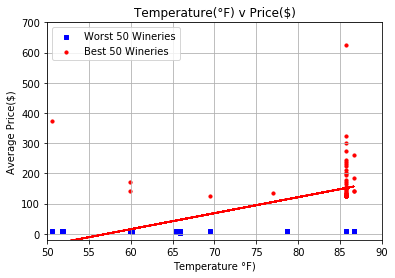

In [60]:
fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(temp, price, s=10, c='b', marker="s", label='Worst 50 Wineries')
ax1.scatter(best_temp,best_price, s=10, c='r', marker="o", label='Best 50 Wineries')
plt.legend(loc='upper left')

plt.xlim(50,90)
plt.ylim(-20,700)

#Giving names to labels
plt.title('Temperature(°F) v Price($)')
plt.xlabel('Temperature °F)')
plt.ylabel('Average Price($)')

x_values = us_temp
regress_values = x_values * slope + intercept 
plt.plot(x_values, regress_values, 'r-')
plt.grid()

plt.show()